# 🧙‍♂️ Análisis de las dimensiones de los poros con **HOLE2**

In [ ]:
# @title # 👻  **Instalación**
%cd ~
!wget https://www.holeprogram.org/downloads/2.2.005/hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
!tar xf hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
!pip install nglview==3.0.8
!pip install "ipywidgets>=7,<8"
!pip install --upgrade MDAnalysis
!pip install --upgrade MDAnalysis[analysis]
!pip install --upgrade MDAnalysisTests
!pip install matplotlib

from google.colab import output
output.enable_custom_widget_manager()
import nglview
import ipywidgets
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_HOLE
from MDAnalysis.analysis import hole2
from MDAnalysis.coordinates.GRO import GROWriter
from MDAnalysis.transformations import center_in_box
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
# suppress some MDAnalysis warnings when writing PDB files
warnings.filterwarnings('ignore')

/root
--2024-05-19 01:13:18--  https://www.holeprogram.org/downloads/2.2.005/hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
Resolving www.holeprogram.org (www.holeprogram.org)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to www.holeprogram.org (www.holeprogram.org)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8847026 (8.4M) [application/gzip]
Saving to: ‘hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz’

hole2-ApacheLicense 100%[===================>]   8.44M  --.-KB/s    in 0.09s   

2024-05-19 01:13:18 (88.8 MB/s) - ‘hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz’ saved [8847026/8847026]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.7 MB/s eta 0:00:00
  Created wheel for nglview: filename=ng

/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [ ]:
# @title # 📁👻 **Ruta de trabajo**
from google.colab import drive
drive.mount('/content/drive')
ruta_carpeta_drive = "cngc" #@param {type:"string"}
carpeta = "/content/drive/MyDrive/" + ruta_carpeta_drive
%cd {carpeta}

Mounted at /content/drive
/content/drive/MyDrive/cngc


The pore model_1.pdb is 153.60001 angstroms long


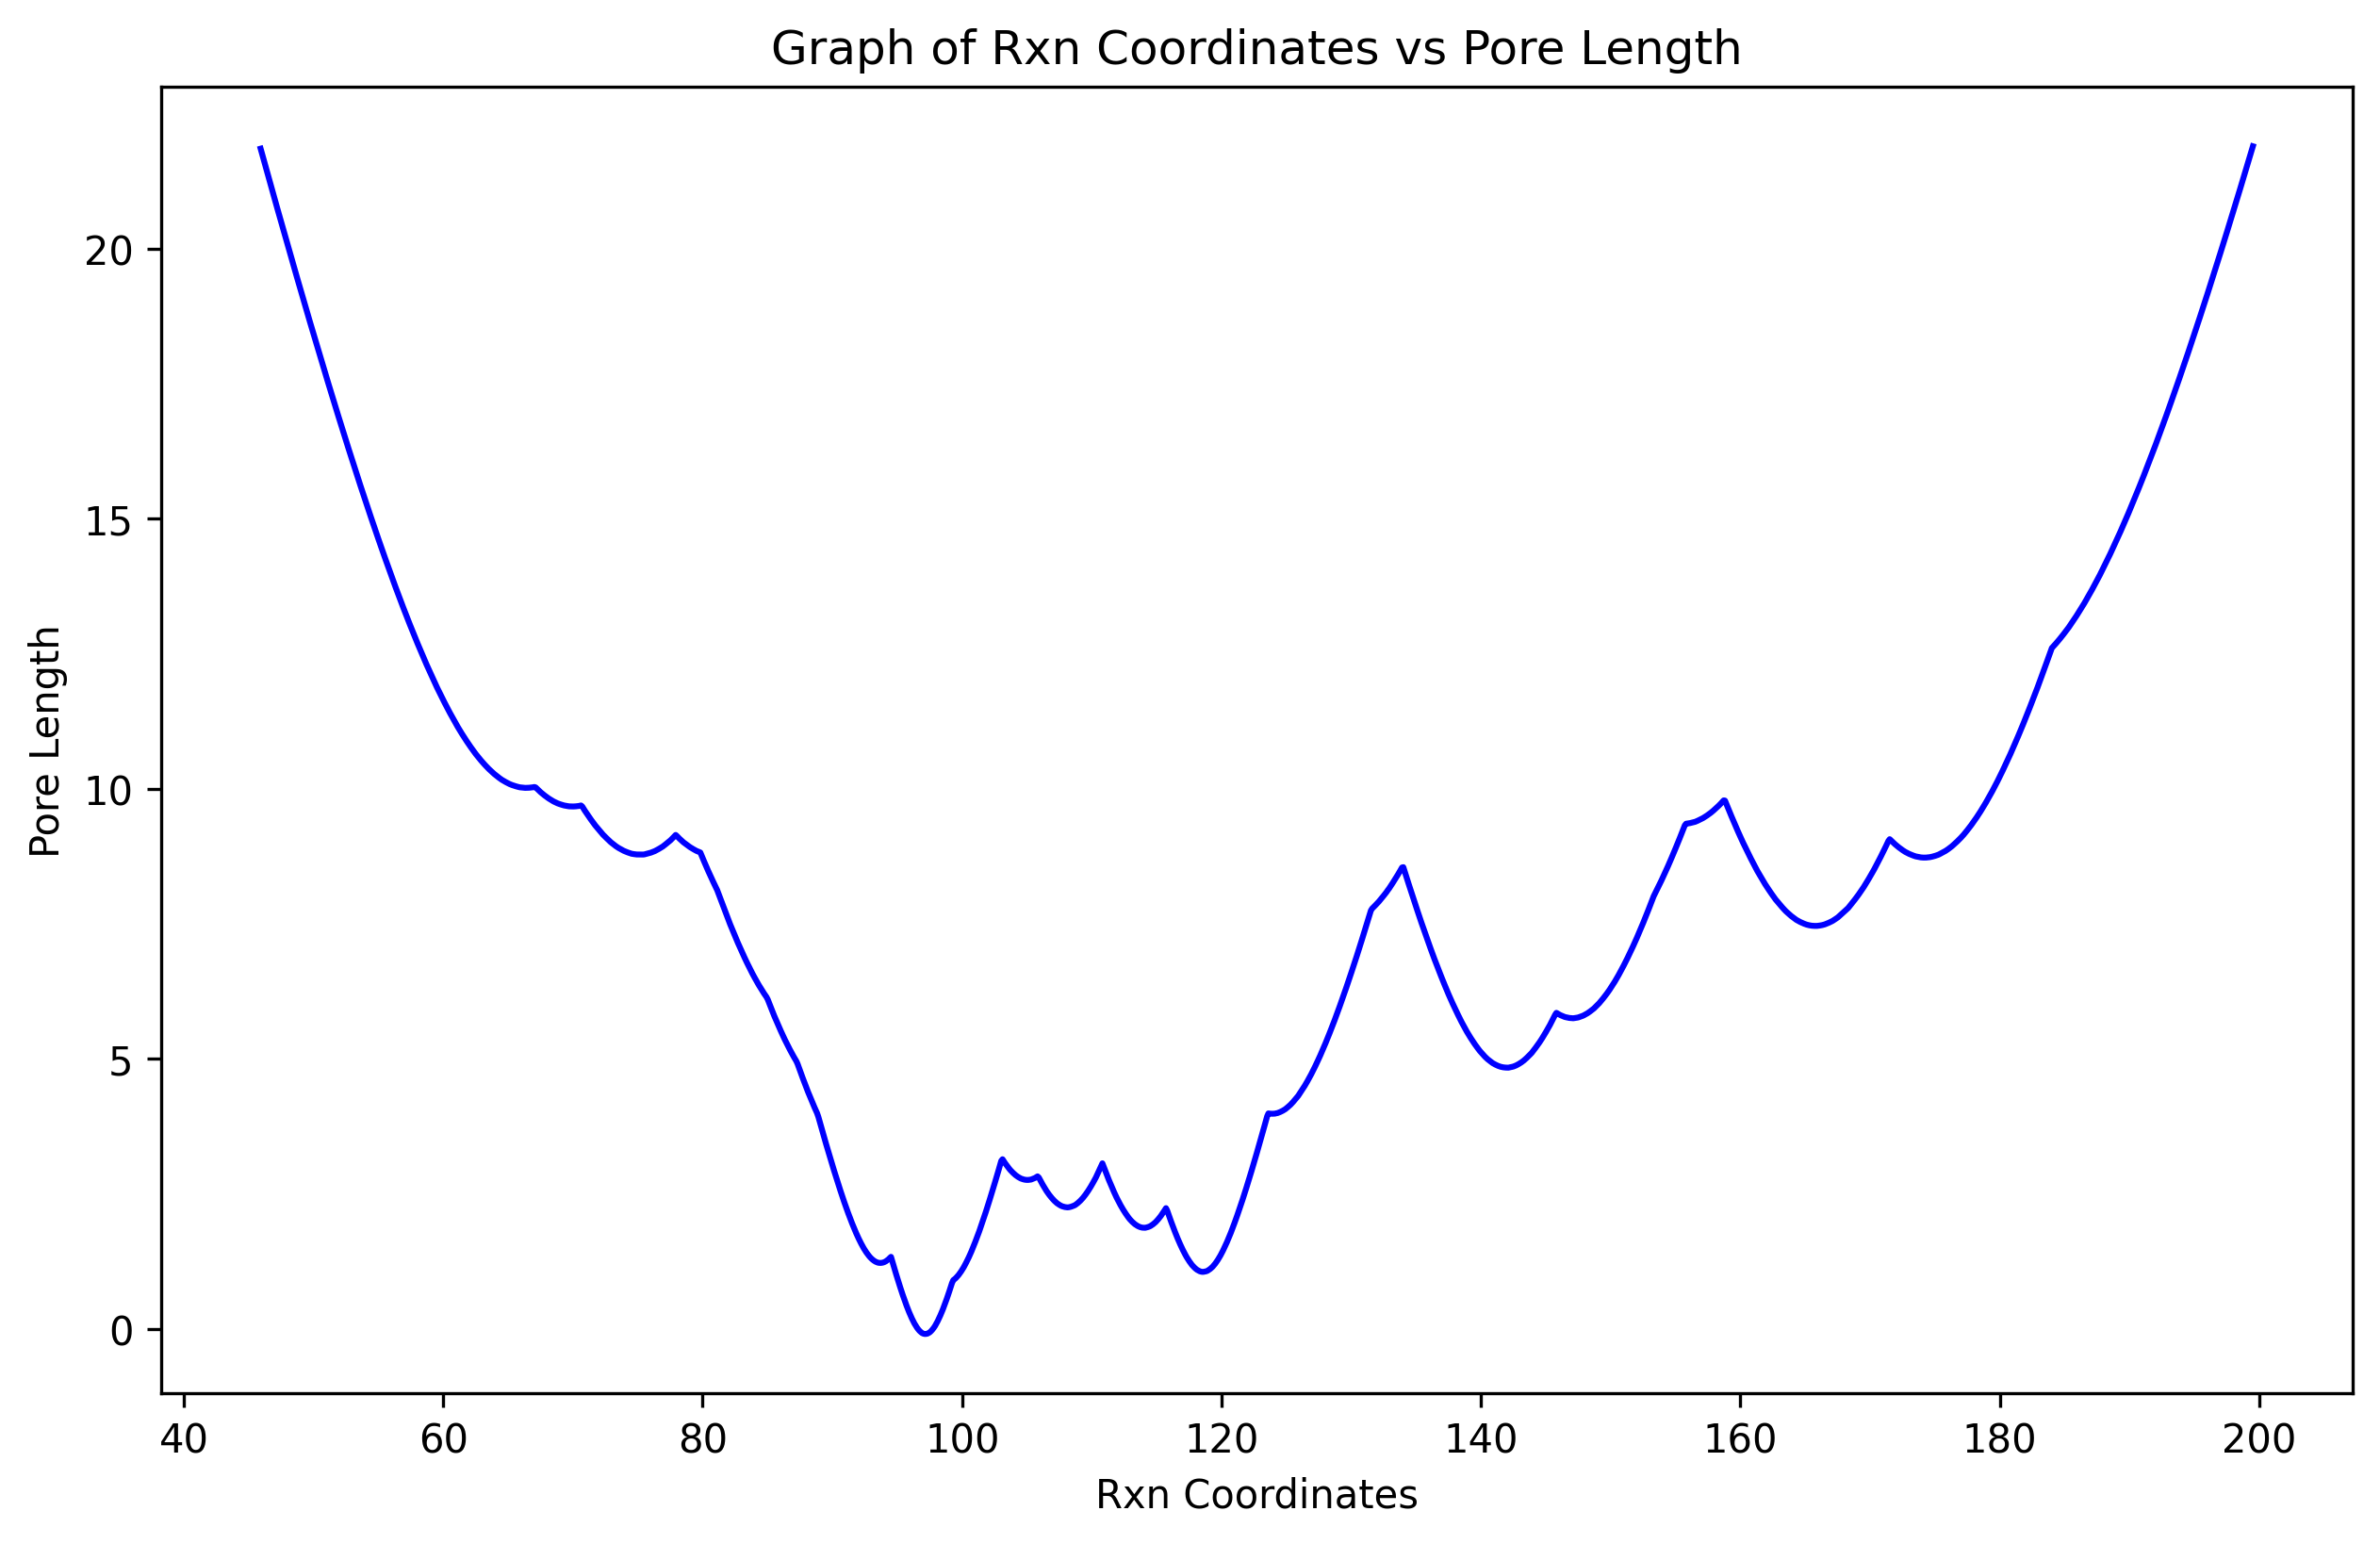

In [ ]:
# @title # 👻 **Análisis de poro**
# @markdown ## 👻1️⃣ **Nombre del archivo con extensión** ***.pdb o .gro***
# @markdown ### 👀 si van a pasar varios archivos separelos con ***espacios***, si surge un error puede ser por un ***doble espacio***
nombre_archivo = "model_1.pdb" # @param {type:"string"}
# @markdown ## 👻2️⃣ **Selecione si va utilizar trayectoria o no**
poro_opcion = "Sin trayectoria"# @param ["Sin trayectoria", "Con trayectoria"]
# @markdown ### ⚠️ **Nombre de la trayectoria con la extensión**
# @markdown ### 👀 si van a pasar varias trayectorias separelas con ***espacios***, si surge un error puede ser por un ***doble espacio***
nombre_trayectoria = "" # @param {type:"string"}

nombre_archivo = nombre_archivo.split(" ")

from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC
profiles = hole2.hole(PDB_HOLE,
                      outfile='hole1.out',
                      sphpdb_file='hole1.sph',
                      vdwradii_file=None,
                      random_seed=31415,
                      executable='/root/hole2/exe/hole',
                      )
if poro_opcion == "Sin trayectoria":
  for archivo in nombre_archivo:
    profiles = hole2.hole(archivo,
                          outfile=f'{archivo}.out',
                          sphpdb_file=f'{archivo}.sph',
                          vdwradii_file=None,
                          random_seed=31415,
                          executable='/root/hole2/exe/hole',
                          )
    hole2.create_vmd_surface(filename=f'{archivo}.vmd',
                         sphpdb=f'{archivo}.sph',
                         sph_process='/root/hole2/exe/sph_process',
                         )
    rxn_coords = profiles[0].rxn_coord
    pore_length = rxn_coords[-1] - rxn_coords[0]
    print(f'The pore {archivo} is {pore_length} angstroms long')
    # Asumiendo que profiles[0].rxn_coord es una lista de coordenadas
    rxn_coords = profiles[0].rxn_coord

    # Calcula el pore_length
    pore_length = profiles[0].radius



    # Crear la gráfica
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(rxn_coords, pore_length, linestyle='-', color='b')
    plt.xlabel('Rxn Coordinates')
    plt.ylabel('Pore Length')
    plt.title('Graph of Rxn Coordinates vs Pore Length')
    plt.show()

In [ ]:
!ls

 1ZTO.pdb		      model_1.pdb.sph.old		   step7_30.cpt       tmpbccbo5i1
 1ZTO.pdb.out		      model_1.pdb.vmd			   step7_30.edr       tmp_mi3ivst
 1ZTO.pdb.sph		      proteinas_centradas.gro		   step7_30.gro       tmpmisamnfk
 1ZTO.pdb.sph.old	      proteinas_centradas.pdb		   step7_30.gro.out   tmpnr_x1ust
 5KHJ.pdb		      proteinas.gro			   step7_30.gro.sph   tmpq2gtz4dp
 5KHJ.pdb.out		      simple2.rad			   step7_30.log       tmpquop1i9n
 5KHJ.pdb.sph		      step5_input.gro			   step7_30.tpr       tmpqziiftiu
 5KHJ.pdb.sph.old	      step5_input.gro_limpia.gro	   step7_30.trr       tmptuchu4a6
 combined_3.trr		      step5_input.gro_limpia.gro.out	   step7_30.xvg       tmpve5jxz3d
 combined_traj.trr	      step5_input.gro_limpia.gro.sph	   tmp13ytt0je	      tmpvj6zb924
'Copia de topol.top'	      step5_input.gro_limpia.gro.sph.old   tmp430qg0br	      tmpvyrgihv5
 hole2			      step5_input.gro.out		   tmp473hpcyv	      tmpwsptxvjf
 model_1.pdb		      step5_input.gro.sph		   tmp835ngz6i	  

In [ ]:
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE

u = mda.Universe('step7_30.tpr','t23.trr')
ha = hole2.HoleAnalysis(u, select='protein and (segid seg_9_PROA or segid seg_10_PROB or segid seg_11_PROC or segid seg_12_PROD) ',
                        cpoint='center_of_geometry',
                        executable='/root/hole2/exe/hole',
                        )
ha.run(random_seed=31415)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
gathered = ha.gather()
print(gathered.keys())
print(len(gathered['rxn_coord']))
print(len(gathered['radius']))
print(len(gathered['cen_line_D']))

In [ ]:
gathered = ha.gather()
radii, edges = ha.bin_radii(bins=100, range=None)
means, edges = ha.histogram_radii(bins=100, range=None,
                                  aggregator=np.mean)

Text(0.5, 0, 'Pore coordinate $\\zeta$ ($\\AA$)')

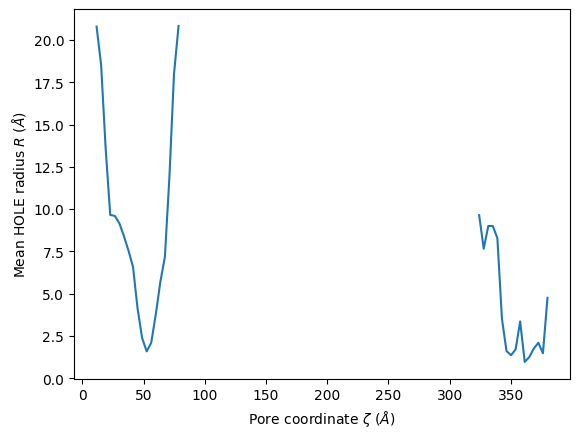

In [ ]:
midpoints = 0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints, means)
plt.ylabel(r"Mean HOLE radius $R$ ($\AA$)")
plt.xlabel(r"Pore coordinate $\zeta$ ($\AA$)")

In [ ]:
min_radii = ha.min_radius()
for frame, min_radius in min_radii:
    print(f"Frame {int(frame)}: {min_radius:.3f}")

Frame 0: 0.610
Frame 1: 0.204
Frame 2: 0.954
Frame 3: 1.342
Frame 4: 1.078
Frame 5: 0.774


Text(0.5, 0, 'Frame')

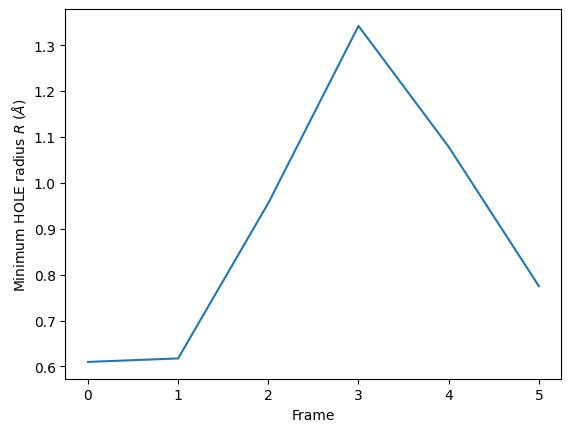

In [ ]:
plt.plot(min_radii[:, 0], min_radii[:, 1])
plt.ylabel('Minimum HOLE radius $R$ ($\AA$)')
plt.xlabel('Frame')

In [ ]:
import MDAnalysis as mda

# Cargar la estructura desde el archivo .gro
u = mda.Universe("step7_30.tpr")

# Acceder a la selección de átomos
atoms = u.atoms

# Imprimir información sobre los átomos disponibles para selección
print("Tipos de átomos disponibles para selección:")
print(set(atoms.types))

# Imprimir información sobre los residuos disponibles para selección
print("Tipos de residuos disponibles para selección:")
print(set(atom.resname for atom in atoms))

# Imprimir información sobre las cadenas disponibles para selección
print("Nombres de cadenas disponibles para selección:")
print(set(atom.segment.segid for atom in atoms))


Tipos de átomos disponibles para selección:
{'HC', 'OC', 'HAL3', 'N', 'CP2', 'HR1', 'SOD', 'CY', 'HT', 'OBL', 'HS', 'O2L', 'CTL2', 'CLA', 'CL', 'HAL2', 'NH2', 'HEL1', 'HB1', 'HR3', 'NR1', 'HA2', 'OSLP', 'CEL1', 'HB2', 'PL', 'NY', 'NR2', 'CT3', 'HAL1', 'DA', 'HP', 'CTL5', 'NH1', 'CP3', 'NC2', 'CC', 'CPT', 'CAI', 'DZ', 'NH3', 'CPH2', 'OT', 'HA1', 'CTL1', 'CP1', 'C', 'CTL3', 'O', 'CT1', 'CPH1', 'OH1', 'NTL', 'S', 'CT2A', 'CA', 'H', 'HL', 'CT2', 'OSL', 'HA3'}
Tipos de residuos disponibles para selección:
{'SOD', 'LYS', 'CLA', 'MET', 'GLY', 'ASN', 'ILE', 'ARG', 'TIP3', 'CYS', 'TRP', 'HSD', 'TYR', 'LEU', 'SER', 'GLN', 'THR', 'ASP', 'PRO', 'GLU', 'POPC', 'PHE', 'CAM', 'ALA', 'VAL'}
Nombres de cadenas disponibles para selección:
{'seg_9_PROA', 'seg_12_PROD', 'seg_4_POPC', 'seg_7_CAM', 'seg_10_PROB', 'seg_0_PROA', 'seg_16_CAM', 'seg_14_SOD', 'seg_8_TIP3', 'seg_11_PROC', 'seg_3_PROD', 'seg_1_PROB', 'seg_2_PROC', 'seg_6_CLA', 'seg_15_CLA', 'seg_13_POPC', 'seg_17_TIP3', 'seg_5_SOD'}


<Axes: xlabel='Pore coordinate $\\zeta$ ($\\AA$)', ylabel='HOLE radius $R$ ($\\AA$)'>

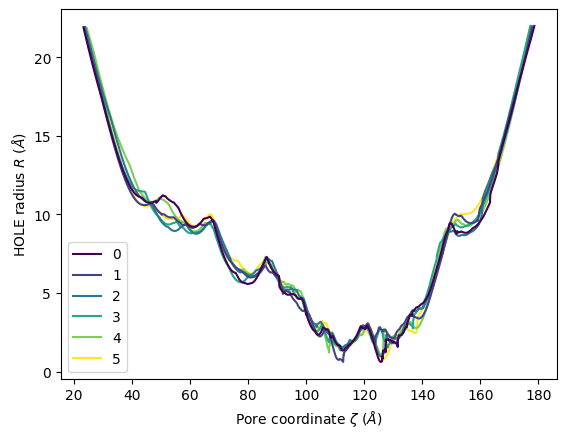

In [ ]:
ha.plot()


<Axes3D: xlabel='Pore coordinate $\\zeta$ ($\\AA$)', ylabel='Frames', zlabel='HOLE radius $R$ ($\\AA$)'>

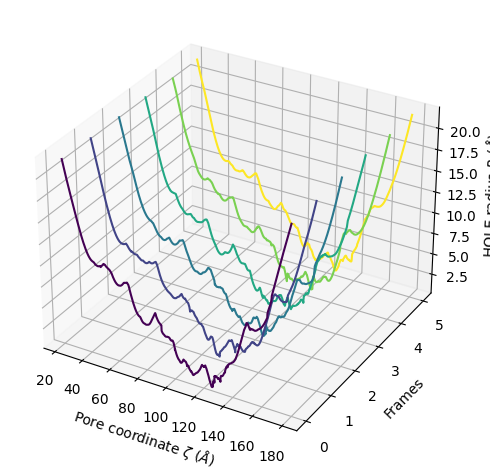

In [ ]:
ha.plot3D()

<Axes: xlabel='Pore coordinate $\\zeta$ ($\\AA$)', ylabel='HOLE radius $R$ ($\\AA$)'>

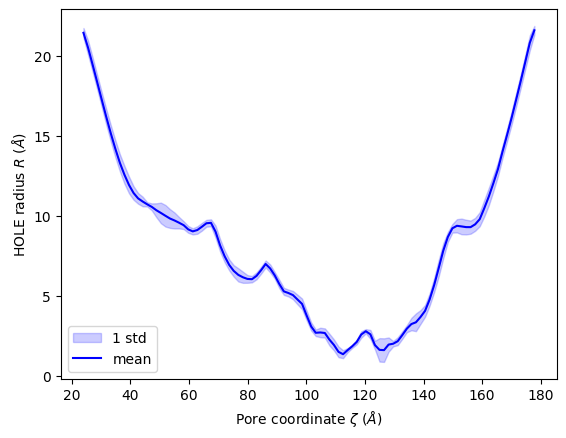

In [ ]:
ha.plot_mean_profile(bins=100,  # how much to chunk rxn_coord
                     n_std=1,  # how many standard deviations from mean
                     color='blue',  # color of plot
                     fill_alpha=0.2,  # opacity of standard deviation
                     legend=True)

In [ ]:
from MDAnalysis.analysis import rms

ref = mda.Universe("step7_30.gro")
rmsd = rms.RMSD(u, ref, select='protein', weights='mass').run()
rmsd_values = rmsd.rmsd[:, 2]
for i, rmsd in enumerate(rmsd_values):
    print(f"Frame {i}:  {rmsd:.2f}")

Frame 0:  43.45
Frame 1:  43.70
Frame 2:  43.43
Frame 3:  43.39
Frame 4:  43.41
Frame 5:  43.31


<Axes: xlabel='RMSD to reference ($\\AA$)', ylabel='Minimum HOLE pore radius $r$ ($\\AA$)'>

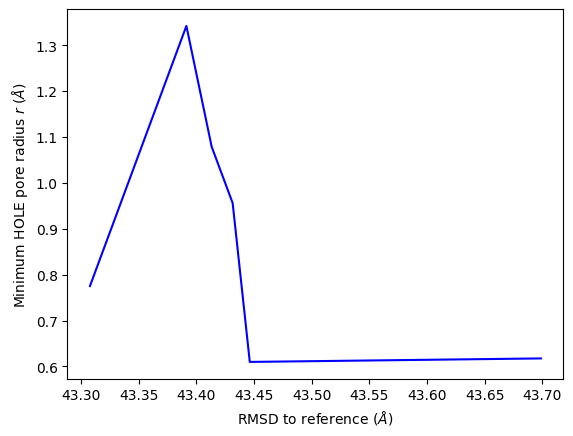

In [ ]:
ha.plot_order_parameters(rmsd_values,
                         aggregator=min,
                         xlabel='RMSD to reference ($\AA$)',
                         ylabel='Minimum HOLE pore radius $r$ ($\AA$)')

<Axes3D: xlabel='Pore coordinate $\\zeta$ ($\\AA$)', ylabel='RMSD to reference ($\\AA$)', zlabel='HOLE radius $R$ ($\\AA$)'>

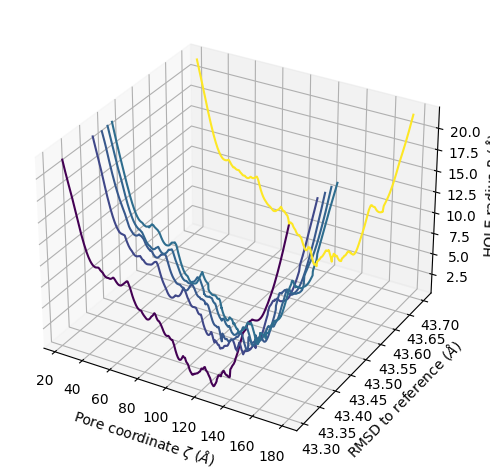

In [ ]:
ha.plot3D_order_parameters(rmsd_values,
                           ylabel='RMSD to reference ($\AA$)')